male: 1;  female: 0

In [35]:
# from google.colab import drive

# drive.mount('/content/gdrive/', force_remount=True)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# import lightgbm as lgb

# # For a classification model
# from lightgbm import LGBMClassifier


In [39]:
%pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.experimental import enable_halving_search_cv  # noqa
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score,train_test_split, GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import (
    count,
    selection_rate,
    equalized_odds_difference,
    false_positive_rate,
    false_negative_rate,
)
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import EqualizedOdds
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import warnings

warnings.simplefilter("ignore")



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
df = pd.read_csv("C:\\Users\\liuxuemeng\\Desktop\\thesis\\notebooks\\Thesis\\merged_data1.csv")

In [41]:
df.shape[1]

50

In [42]:
df.drop(columns='ID', inplace=True)

In [43]:
df.shape[1]

49

In [44]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff',
       'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staf

In [45]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target,ACCOUNT_LENGTH
0,1,1,1,0,427500.0,3.0,1,0,0,2.0,...,0,0,0,0,0,0,0,1,1,15
1,1,1,1,0,427500.0,3.0,1,0,0,2.0,...,0,0,0,0,0,0,0,1,1,14
2,1,1,1,0,112500.0,1.0,0,0,0,2.0,...,0,0,0,0,0,1,0,0,0,29
3,0,0,1,0,270000.0,1.0,0,1,1,1.0,...,0,0,0,1,0,0,0,0,0,4
4,0,0,1,0,270000.0,1.0,0,1,1,1.0,...,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,1.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,11
36453,0,0,1,0,157500.0,3.0,0,1,1,2.0,...,1,0,0,0,0,0,0,0,1,23
36454,0,0,1,0,157500.0,3.0,0,1,1,2.0,...,1,0,0,0,0,0,0,0,1,32
36455,0,0,1,0,283500.0,1.0,0,0,0,2.0,...,0,0,0,1,0,0,0,0,1,9


In [46]:
# Select the columns where you want to remove outliers
columns_to_filter = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Calculate upper bounds for each selected column
upper_bounds = df[columns_to_filter].quantile(0.98)

# Define the boundaries for outlier removal
upper_bound_limits = upper_bounds 

# Filter out the rows containing outliers in any of the selected columns
df = df[~(df[columns_to_filter] > upper_bound_limits).any(axis=1)]

In [47]:
sensitive_features= 'CODE_GENDER'
A = df[sensitive_features]
A.head()

2    1
3    0
4    0
5    0
6    0
Name: CODE_GENDER, dtype: int64

In [48]:
X = df.drop(['target', 'CODE_GENDER'], axis=1)
y = df['target']

In [49]:
# X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.2, stratify=y, random_state=42)

X_train_val, X_test, y_train_val, y_test, A_train_val, A_test = train_test_split(X, y, A, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val, A_train, A_val = train_test_split(X_train_val, y_train_val, A_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

In [50]:
y_train.count()

17901

##RF##

In [51]:
def resample_training_data(X_train, Y_train, A_train):
    """Down-sample the majority class in the training dataset to produce a
    balanced dataset with a 50/50 split in the predictive labels.

    Parameters:
    X_train: The training split of the features
    Y_train: The training split of the target labels
    A_train: The training split of the sensitive features

    Returns:
    Tuple of X_train, Y_train, A_train where each dataset has been re-balanced.
    """
    negative_ids = Y_train[Y_train == 0].index
    positive_ids = Y_train[Y_train == 1].index
    balanced_ids = positive_ids.union(
        np.random.choice(a=negative_ids, size=len(positive_ids))
    )

    X_train = X_train.loc[balanced_ids, :]
    Y_train = Y_train.loc[balanced_ids]
    A_train = A_train.loc[balanced_ids]
    return X_train, Y_train, A_train

In [52]:
X_train_down, y_train_down, A_train_down = resample_training_data(X_train, y_train, A_train)

In [53]:
y_train_down.count()

4166

In [54]:
A_train_down.value_counts()

CODE_GENDER
0    2836
1    1330
Name: count, dtype: int64

Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline steps
pipeline_steps = [
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(random_state=2, solver='liblinear'))
]

# Create the pipeline
model_pipeline_lr = Pipeline(steps=pipeline_steps)

# Define the parameter grid for LogisticRegression
param_grid_lr = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__fit_intercept': [True, False],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__penalty': ['l1', 'l2']
}

# Perform RandomizedSearchCV
random_search_lr = RandomizedSearchCV(model_pipeline_lr, param_grid_lr, scoring='balanced_accuracy', cv=5, n_iter=50, random_state=234).fit(X_train_down, y_train_down)

# Get the best estimator
best_estimator_lr = random_search_lr.best_estimator_

# Print the best parameters
print("Best parameters found: ", random_search_lr.best_params_)
print("Best estimator: ", best_estimator_lr)

Best parameters found:  {'classifier__penalty': 'l1', 'classifier__fit_intercept': False, 'classifier__class_weight': None, 'classifier__C': 0.23357214690901212}
Best estimator:  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=0.23357214690901212, fit_intercept=False,
                                    penalty='l1', random_state=2,
                                    solver='liblinear'))])


In [56]:
num_iterations = 10
mean_balanced_accuracies = []
mean_false_positive_rates = []
mean_false_negative_rates = []
mean_balanced_accuracies_male = []
mean_balanced_accuracies_female = []
mean_false_negative_rates_male = []
mean_false_negative_rates_female = []
mean_false_positive_rates_male = []
mean_false_positive_rates_female = []
fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_negative_rate": false_negative_rate
}
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]
for i in range(num_iterations):
    # Split the dataset with a different seed each iteration
    X_train_i, X_test_i, y_train_i, y_test_i, A_train_i, A_test_i = train_test_split(X_train_val, y_train_val, A_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    X_train_down_i, y_train_down_i, A_train_down_i = resample_training_data(X_train_i, y_train_i, A_train_i)
    # Train the model on the re-sampled dataset
    best_estimator_lr.fit(X_train_down_i, y_train_down_i)
    # Evaluate on the test set
    y_pred_i = best_estimator_lr.predict(X_test_i)
    balanced_acc = balanced_accuracy_score(y_test_i, y_pred_i)
    mean_balanced_accuracies.append(balanced_acc)
    
    metricframe_unmitigated = MetricFrame(
        metrics=fairness_metrics,
        y_true=y_test_i,
        y_pred=y_pred_i,
        sensitive_features=A_test_i,
        )
    # overall metrics
    metricframe_unmitigated.overall[metrics_to_report]
    mean_false_positive_rates.append(metricframe_unmitigated.overall['false_positive_rate'])
    mean_false_negative_rates.append(metricframe_unmitigated.overall['false_negative_rate'])
    # Group metrics
    metricframe_unmitigated.by_group[metrics_to_report]
    mean_balanced_accuracies_male.append(metricframe_unmitigated.by_group['balanced_accuracy'][1])
    mean_balanced_accuracies_female.append(metricframe_unmitigated.by_group['balanced_accuracy'][0])
    mean_false_negative_rates_male.append(metricframe_unmitigated.by_group['false_negative_rate'][1])
    mean_false_negative_rates_female.append(metricframe_unmitigated.by_group['false_negative_rate'][0])
    mean_false_positive_rates_male.append(metricframe_unmitigated.by_group['false_positive_rate'][1])
    mean_false_positive_rates_female.append(metricframe_unmitigated.by_group['false_positive_rate'][0])

# Calculate the mean balanced accuracy across all iterations
final_mean_balanced_accuracy = np.mean(mean_balanced_accuracies)
# Calculate the mean false positive/negative rate and false negative rate across all iterations
final_mean_false_positive_rate = np.mean(mean_false_positive_rates)
final_mean_false_negative_rate = np.mean(mean_false_negative_rates)

# Calculate the metrics by sensitive group
final_mean_balanced_accuracies_male = np.mean(mean_balanced_accuracies_male)
final_mean_balanced_accuracies_female = np.mean(mean_balanced_accuracies_female)
final_mean_false_negative_rates_male = np.mean(mean_false_negative_rates_male)
final_mean_false_negative_rates_female = np.mean(mean_false_negative_rates_female)
final_mean_false_positive_rates_male = np.mean(mean_false_positive_rates_male)
final_mean_false_positive_rates_female = np.mean(mean_false_positive_rates_female)

# Calculate standard deviations
std_balanced_accuracies_male = np.std(mean_balanced_accuracies_male)
std_balanced_accuracies_female = np.std(mean_balanced_accuracies_female)
std_false_negative_rates_male = np.std(mean_false_negative_rates_male)
std_false_negative_rates_female = np.std(mean_false_negative_rates_female)
std_false_positive_rates_male = np.std(mean_false_positive_rates_male)
std_false_positive_rates_female = np.std(mean_false_positive_rates_female)

print("Mean Balanced Accuracy over", num_iterations, "iterations:", final_mean_balanced_accuracy)
print("Mean False Positive Rate over", num_iterations, "iterations:", final_mean_false_positive_rate)
print("Mean False Negative Rate over", num_iterations, "iterations:", final_mean_false_negative_rate)

# Plot final mean balanced accuracy, false positive rate, and false negative rate by groups in 3 saparate bar plots with specific mean values and error bars on top of each bar



Mean Balanced Accuracy over 10 iterations: 0.5481614444848799
Mean False Positive Rate over 10 iterations: 0.4363860447478195
Mean False Negative Rate over 10 iterations: 0.4672910662824208


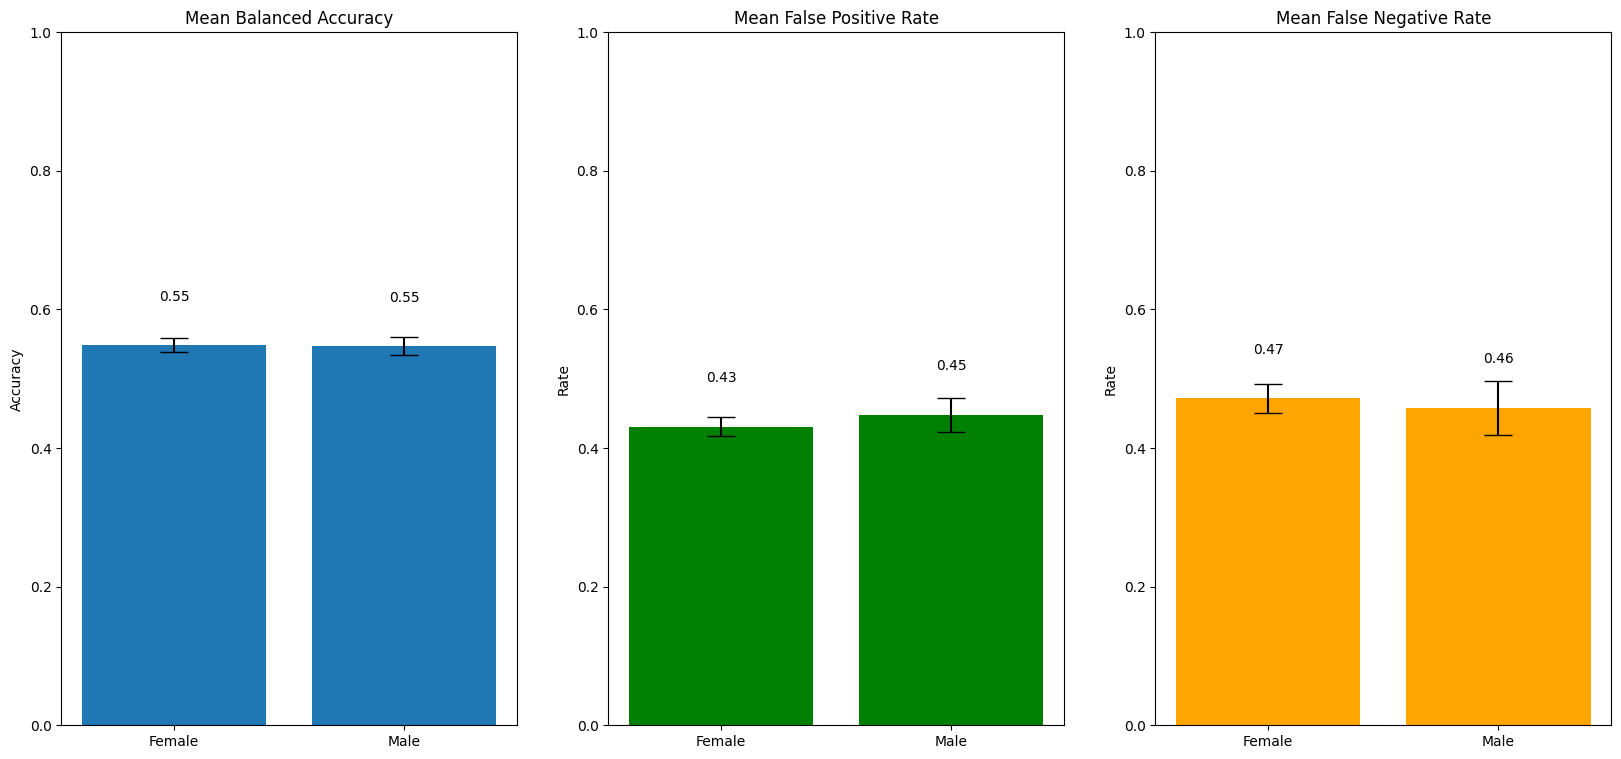

In [57]:
# Create lists for plotting
groups = ['Female', 'Male']
balanced_accuracies = [final_mean_balanced_accuracies_female, final_mean_balanced_accuracies_male]
false_negative_rates = [final_mean_false_negative_rates_female, final_mean_false_negative_rates_male]
false_positive_rates = [final_mean_false_positive_rates_female, final_mean_false_positive_rates_male]

balanced_accuracies_err = [std_balanced_accuracies_female, std_balanced_accuracies_male]
false_negative_rates_err = [std_false_negative_rates_female, std_false_negative_rates_male]
false_positive_rates_err = [std_false_positive_rates_female, std_false_positive_rates_male]


# Plotting
plt.figure(figsize=(20, 9))

plt.subplot(131)
bars = plt.bar(groups, balanced_accuracies, yerr=balanced_accuracies_err, capsize=10)
plt.title('Mean Balanced Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')

plt.subplot(132)
bars = plt.bar(groups, false_positive_rates, yerr=false_positive_rates_err, capsize=10, color='green')
plt.title('Mean False Positive Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')


plt.subplot(133)
bars = plt.bar(groups, false_negative_rates, yerr=false_negative_rates_err, capsize=10, color='orange')
plt.title('Mean False Negative Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')



Random Forest

In [58]:
pipeline_steps = [
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=2))
]
model_pipeline0 = Pipeline(steps=pipeline_steps)
# Define the parameter grid
param_grid = {
    'classifier__n_estimators': np.arange(20, 721, 40),
    'classifier__class_weight': ['None', 'balanced'],
    'classifier__max_depth': np.arange(3, 15, 1)
}

random_search = RandomizedSearchCV(model_pipeline0, param_grid, scoring='balanced_accuracy', cv=5, random_state=234).fit(X_train_down, y_train_down)

random_search.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=180, random_state=2))])

In [59]:
best_model = random_search.best_estimator_

In [60]:
num_iterations = 10
mean_balanced_accuracies = []
mean_false_positive_rates = []
mean_false_negative_rates = []
mean_balanced_accuracies_male = []
mean_balanced_accuracies_female = []
mean_false_negative_rates_male = []
mean_false_negative_rates_female = []
mean_false_positive_rates_male = []
mean_false_positive_rates_female = []
fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_negative_rate": false_negative_rate
}
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]
for i in range(num_iterations):
    # Split the dataset with a different seed each iteration
    X_train_i, X_test_i, y_train_i, y_test_i, A_train_i, A_test_i = train_test_split(X_train_val, y_train_val, A_train_val, test_size=0.25, stratify=y_train_val, random_state=i)
    X_train_down_i, y_train_down_i, A_train_down_i = resample_training_data(X_train_i, y_train_i, A_train_i)
    # Train the model on the re-sampled dataset
    best_model.fit(X_train_down_i, y_train_down_i)
    # Evaluate on the test set
    y_pred_i = best_model.predict(X_test_i)
    balanced_acc = balanced_accuracy_score(y_test_i, y_pred_i)
    mean_balanced_accuracies.append(balanced_acc)
    
    metricframe_unmitigated = MetricFrame(
        metrics=fairness_metrics,
        y_true=y_test_i,
        y_pred=y_pred_i,
        sensitive_features=A_test_i,
        )
    # overall metrics
    metricframe_unmitigated.overall[metrics_to_report]
    mean_false_positive_rates.append(metricframe_unmitigated.overall['false_positive_rate'])
    mean_false_negative_rates.append(metricframe_unmitigated.overall['false_negative_rate'])
    # Group metrics
    metricframe_unmitigated.by_group[metrics_to_report]
    mean_balanced_accuracies_male.append(metricframe_unmitigated.by_group['balanced_accuracy'][1])
    mean_balanced_accuracies_female.append(metricframe_unmitigated.by_group['balanced_accuracy'][0])
    mean_false_negative_rates_male.append(metricframe_unmitigated.by_group['false_negative_rate'][1])
    mean_false_negative_rates_female.append(metricframe_unmitigated.by_group['false_negative_rate'][0])
    mean_false_positive_rates_male.append(metricframe_unmitigated.by_group['false_positive_rate'][1])
    mean_false_positive_rates_female.append(metricframe_unmitigated.by_group['false_positive_rate'][0])

# Calculate the mean balanced accuracy across all iterations
final_mean_balanced_accuracy = np.mean(mean_balanced_accuracies)
# Calculate the mean false positive/negative rate and false negative rate across all iterations
final_mean_false_positive_rate = np.mean(mean_false_positive_rates)
final_mean_false_negative_rate = np.mean(mean_false_negative_rates)

# Calculate the metrics by sensitive group
final_mean_balanced_accuracies_male = np.mean(mean_balanced_accuracies_male)
final_mean_balanced_accuracies_female = np.mean(mean_balanced_accuracies_female)
final_mean_false_negative_rates_male = np.mean(mean_false_negative_rates_male)
final_mean_false_negative_rates_female = np.mean(mean_false_negative_rates_female)
final_mean_false_positive_rates_male = np.mean(mean_false_positive_rates_male)
final_mean_false_positive_rates_female = np.mean(mean_false_positive_rates_female)

# Calculate standard deviations
std_balanced_accuracies_male = np.std(mean_balanced_accuracies_male)
std_balanced_accuracies_female = np.std(mean_balanced_accuracies_female)
std_false_negative_rates_male = np.std(mean_false_negative_rates_male)
std_false_negative_rates_female = np.std(mean_false_negative_rates_female)
std_false_positive_rates_male = np.std(mean_false_positive_rates_male)
std_false_positive_rates_female = np.std(mean_false_positive_rates_female)

print("Mean Balanced Accuracy over", num_iterations, "iterations:", final_mean_balanced_accuracy)
print("Mean False Positive Rate over", num_iterations, "iterations:", final_mean_false_positive_rate)
print("Mean False Negative Rate over", num_iterations, "iterations:", final_mean_false_negative_rate)

# Plot final mean balanced accuracy, false positive rate, and false negative rate by groups in 3 saparate bar plots with specific mean values and error bars on top of each bar








Mean Balanced Accuracy over 10 iterations: 0.5609241245455111
Mean False Positive Rate over 10 iterations: 0.5089874857792946
Mean False Negative Rate over 10 iterations: 0.369164265129683


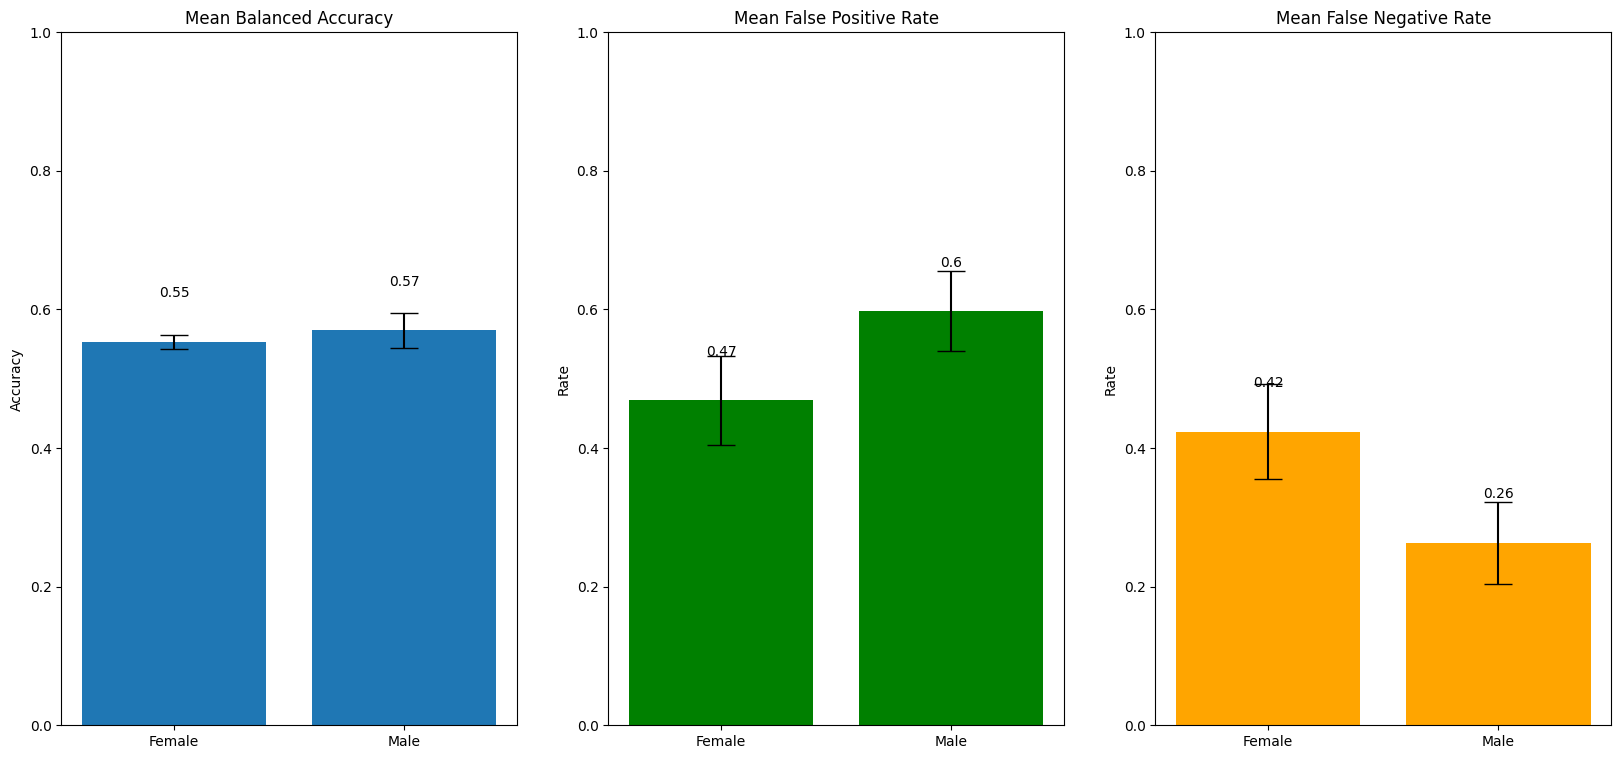

In [61]:
# Create lists for plotting
groups = ['Female', 'Male']
balanced_accuracies = [final_mean_balanced_accuracies_female, final_mean_balanced_accuracies_male]
false_negative_rates = [final_mean_false_negative_rates_female, final_mean_false_negative_rates_male]
false_positive_rates = [final_mean_false_positive_rates_female, final_mean_false_positive_rates_male]

balanced_accuracies_err = [std_balanced_accuracies_female, std_balanced_accuracies_male]
false_negative_rates_err = [std_false_negative_rates_female, std_false_negative_rates_male]
false_positive_rates_err = [std_false_positive_rates_female, std_false_positive_rates_male]


# Plotting
plt.figure(figsize=(20, 9))

plt.subplot(131)
bars = plt.bar(groups, balanced_accuracies, yerr=balanced_accuracies_err, capsize=10)
plt.title('Mean Balanced Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')

plt.subplot(132)
bars = plt.bar(groups, false_positive_rates, yerr=false_positive_rates_err, capsize=10, color='green')
plt.title('Mean False Positive Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')


plt.subplot(133)
bars = plt.bar(groups, false_negative_rates, yerr=false_negative_rates_err, capsize=10, color='orange')
plt.title('Mean False Negative Rate')
plt.ylabel('Rate')
plt.ylim([0, 1])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.06, round(yval, 2), ha='center', va='bottom')



In [23]:
fairness_metrics = {
    "count": count,
    "balanced_accuracy": balanced_accuracy_score,
    "selection_rate": selection_rate,
    "false_positive_rate": false_positive_rate,
    "false_negative_rate": false_negative_rate
}


In [24]:
metrics_to_report = [
    "balanced_accuracy",
    "false_positive_rate",
    "false_negative_rate",
]


In [25]:
y_pred_rf_test = best_model.predict(X_test)
metricframe_unmitigated_rf_test = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=y_pred_rf_test,
    sensitive_features=A_test,
)

metricframe_unmitigated_rf_test.by_group[metrics_to_report]

metricframe_unmitigated_rf_test.difference()[metrics_to_report]

metricframe_unmitigated_rf_test.overall[metrics_to_report]

balanced_accuracy      0.561009
false_positive_rate    0.559537
false_negative_rate    0.318444
dtype: float64

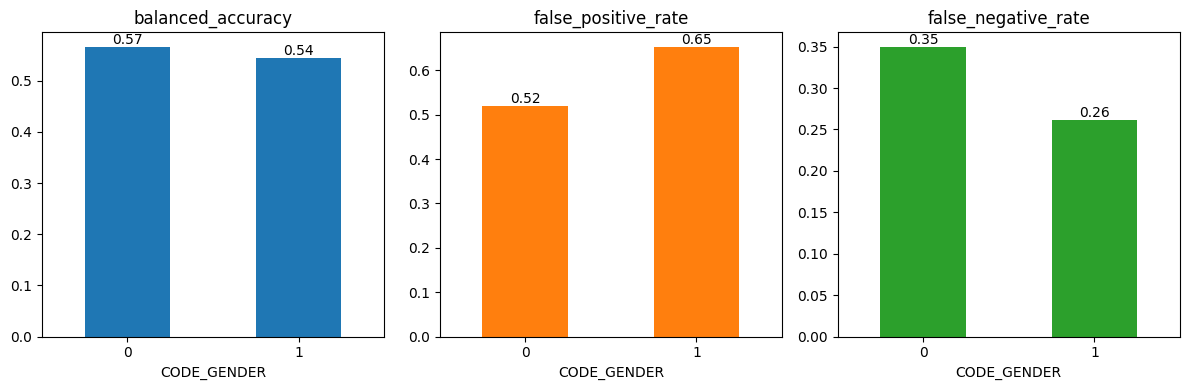

In [26]:
ax_arr = metricframe_unmitigated_rf_test.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

##Postprocessing: ThresholdOptimizer##

In [38]:
postprocess_est = ThresholdOptimizer(
    estimator=best_model,
    constraints="equalized_odds",  # Optimize FPR and FNR simultaneously
    objective="balanced_accuracy_score",
    prefit=True,
    predict_method="predict_proba",
)

In [39]:
postprocess_est.fit(X=X_train_down, y=y_train_down, sensitive_features=A_train_down)

postprocess_pred = postprocess_est.predict(X_test, sensitive_features=A_test)

postprocess_pred_proba = postprocess_est._pmf_predict(
    X_test, sensitive_features=A_test
)

In [40]:
def compare_metricframe_results(mframe_1, mframe_2, metrics, names):
    """Concatenate the results of two MetricFrames along a subset of metrics.

    Parameters
    ----------
    mframe_1: First MetricFrame for comparison
    mframe_2: Second MetricFrame for comparison
    metrics: The subset of metrics for comparison
    names: The names of the selected metrics

    Returns
    -------
    MetricFrame : MetricFrame
        The concatenation of the two MetricFrames, restricted to the metrics
        specified.

    """
    return pd.concat(
        [mframe_1.by_group[metrics], mframe_2.by_group[metrics]],
        keys=names,
        axis=1,
    )

In [41]:
bal_acc_postprocess = balanced_accuracy_score(y_test, postprocess_pred)
eq_odds_postprocess = equalized_odds_difference(
    y_test, postprocess_pred, sensitive_features=A_test
)

metricframe_postprocess = MetricFrame(
    metrics=fairness_metrics,
    y_true=y_test,
    y_pred=postprocess_pred,
    sensitive_features=A_test,
)

metricframe_postprocess.overall[metrics_to_report]

metricframe_postprocess.difference()[metrics_to_report]

balanced_accuracy      0.017507
false_positive_rate    0.019861
false_negative_rate    0.054874
dtype: float64

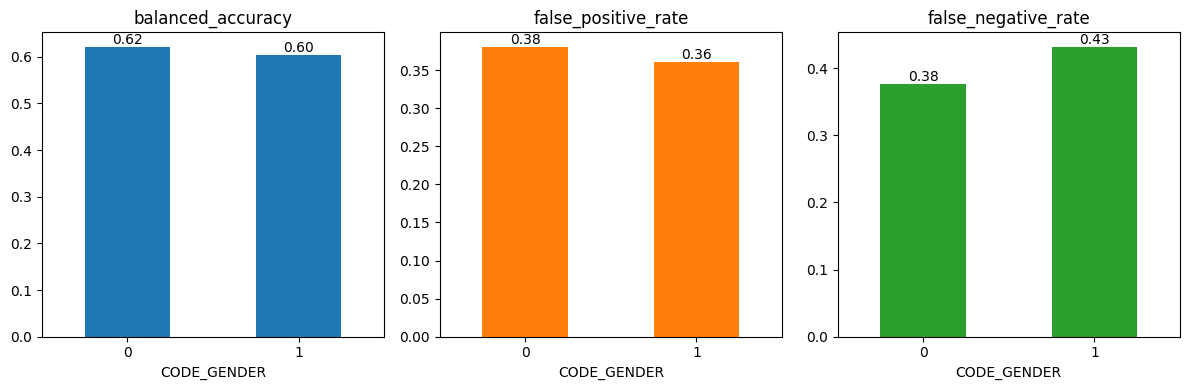

In [43]:
compare_metricframe_results(
    metricframe_unmitigated_rf_test,
    metricframe_postprocess,
    metrics=metrics_to_report,
    names=["Unmitigated", "PostProcess"],
)

ax_arr1 = metricframe_postprocess.by_group[metrics_to_report].plot.bar(
    subplots=True, layout=[1, 3], figsize=[12, 4], legend=None, rot=0
)
# Iterate over each Axes object and each bar
for ax in ax_arr1.flatten():
    for bar in ax.patches:
        value = bar.get_height()
        text = f'{value:.2f}'
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


false positive: the person is not defaulter but labled as one;
false negtive: the person is a defaulter but labled not as one.

#LGB#